# LegacyHalos SersicFitting

This notebook demonstrates how we fit the 1D surface brightness profiles using various parametric (e.g., Sersic) models, using one galaxy as a toy example.

### Imports, paths, and other preliminaries.

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from legacyhalos import io
from legacyhalos.util import ellipse_sbprofile
from legacyhalos.qa import display_ellipse_sbprofile

In [3]:
plt.style.use('seaborn-talk')
%matplotlib inline

In [4]:
pixscale = 0.262
band = ('g', 'r', 'z')
refband = 'r'

### Read the sample

In [5]:
sample = io.read_sample(first=0, last=0)

Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [LSPHOT]
Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [REDMAPPER]
Read 1562 objects from /Users/ioannis/research/projects/legacyhalos/legacyhalos-parent-upenn.fits [SDSSPHOT]
Not copying existing column objid
Sample contains 1 objects with first, last indices 0, 0


In [6]:
objid, objdir = io.get_objid(sample)
ellipsefit = io.read_ellipsefit(objid, objdir)
redshift = sample.z

### Read the measured surface brightness profile

In [7]:
from speclite import filters
filt = filters.load_filters('decam2014-g', 'decam2014-r', 'decam2014-z')
filt.effective_wavelengths.value

array([ 4890.03670428,  6469.62203811,  9196.46396394])

In [11]:
sbprofile = ellipse_sbprofile(ellipsefit, band=band, refband=refband, 
                              redshift=redshift, pixscale=pixscale)
print(sbprofile.keys())

dict_keys(['smaunit', 'sma', 'mu_g', 'mu_g_err', 'mu_r', 'mu_r_err', 'mu_z', 'mu_z_err', 'gr', 'rz', 'gr_err', 'rz_err', 'g_wave_eff', 'r_wave_eff', 'z_wave_eff', 'W1_wave_eff', 'W2_wave_eff'])


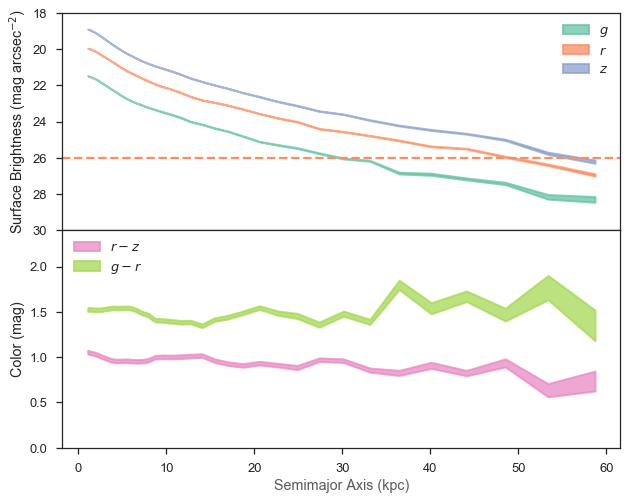

In [9]:
display_ellipse_sbprofile(ellipsefit, band=band, refband=refband, 
                          redshift=redshift, pixscale=pixscale,
                          sersicfit=None)

### Fit a Sersic model

In [12]:
def sb2flux(sb):
    """Convert surface brightness to linear flux."""
    return np.array([10**(-0.4 * _sb) for _sb in np.atleast_1d(sb)])

In [13]:
def fit_sersic_oneband(sbprofile, init_reff=10.0, init_n=2.0):
    """Fit a simple Sersic model to the galaxy surface brightness 
    profile in each bandpass independently.
    
    """
    from scipy.optimize import least_squares
    from astropy.modeling import models, fitting
    
    fixed = {'n': True}
    bounds = {}
    
    fit = fitting.LevMarLSQFitter()
    radius = sbprofile['sma'] # see sbprofile['smaunit'] but typically kpc
    
    sersicfit = dict()
    for filt in band:
        mu = sb2flux(sbprofile['mu_{}'.format(filt)])
        mu_err = sb2flux(sbprofile['mu_{}_err'.format(filt)])
    
        init = models.Sersic1D(amplitude=sb2flux(mu.min()), 
                               r_eff=init_reff, n=init_n,
                               fixed=fixed, bounds=bounds)
        sersicfit[filt] = fit(init, radius, mu, weights=1/mu_err)
        print(sersicfit[filt])

    return sersicfit

In [ ]:
from astropy.modeling.models import Sersic1D
help(Sersic1D)

In [ ]:
from astropy.modeling.core import FittableModel
help(FittableModel)

In [ ]:
def sersic_allbands_model(sbwave, sbdata, params):
    """Evaluate a model in which the Sersic index and 
    half-light radius vary as a power-law function of wavelength.
    
    """
    from astropy.modeling.models import Sersic1D
    refwave, n_ref, re_ref, alpha, beta 
    
    sbmodel = np.zeros_like(sbprofile)
    for uwave in set(wave):
        these = np.where(uwave == wave)[0]
        
        
        
        sb[these] = 
        
        mu = sb2flux(sbprofile['mu_{}'.format(filt)])
        mu_err = sb2flux(sbprofile['mu_{}_err'.format(filt)])
    
        init = models.Sersic1D(amplitude=sb2flux(mu.min()), 
                               r_eff=init_reff, n=init_n,
                               fixed=fixed, bounds=bounds)
        
    
    
    return sb

#### Merge the multiband surface brightness profiles

In [ ]:
sbwave, sbdata = [], []
for filt in band:
    mu = sb2flux(sbprofile['mu_{}'.format(filt)])
    sbdata.append(mu)
    sbwave.append(np.repeat(sbprofile['{}_wave_eff'.format(filt)], len(mu)))
    

In [ ]:
stop

In [15]:
def fit_sersic(sbprofile, init_reff=10.0, init_n=2.0):
    """Fit a single Sersic model to all the bands simultaneously by allowing 
    the half-light radius and Sersic n parameter to vary as a power-law 
    function of wavelength, while allowing the surface brightness at r_e 
    in each band to be free.

    """
    from scipy.optimize import least_squares
    from astropy.modeling import models, fitting
    
    fixed = {
        'refwave': True,
        'n_ref': False,
        're_ref': False,
        'alpha': True, # n = n_ref(wave/refwave)**alpha
        'beta': True   # r_e = r_e,ref(wave/refwave)**beta
    }
    bounds = {
        'refwave': (5500, 5500),
        'n_ref': (0.1, 8),
        're_ref': (0.1, 100),
        'alpha', (-1, 1),
        'beta': (-1, 1)
    }
    for filt in band:
        # surface brightness at re_ref
        fixed.append({'sbe_{}'.format(filt): False}) 
        bounds.append({'sbe_{}'.format(filt): (10, 35)})
             
             
    fit = fitting.LevMarLSQFitter()
    radius = sbprofile['sma'] # see sbprofile['smaunit'] but typically kpc
    
    sersicfit = dict()
    for filt in band:
        mu = sb2flux(sbprofile['mu_{}'.format(filt)])
        mu_err = sb2flux(sbprofile['mu_{}_err'.format(filt)])
    
        init = models.Sersic1D(amplitude=sb2flux(mu.min()), 
                               r_eff=init_reff, n=init_n,
                               fixed=fixed, bounds=bounds)
        sersicfit[filt] = fit(init, radius, mu, weights=1/mu_err)
        print(sersicfit[filt])

    return sersicfit

SyntaxError: invalid syntax (<ipython-input-15-9d8a5d7dfab3>, line 22)

In [ ]:
def lnprobfn(theta, residuals=False):
    """For now, just compute a vector of chi values, for use
    with non-linear least-squares algorithms.
    
    """
    from astropy.modeling import models
    if residuals:
        init = models.Sersic1D(amplitude=sb2flux(mu.min()), 
                               r_eff=init_reff, n=init_n,
                               fixed=fixed, bounds=bounds)

In [ ]:
def chivecfn(theta):
    """Return the residuals instead of the posterior probability or negative
    chisq, for use with least-squares optimization methods.
    """
    return lnprobfn(theta, residuals=True)

In [ ]:
def minimizer_ball(guess, nmin=5, seed=None):
    """Draw initial values from the (1d, separable, independent) priors for
    each parameter.  Requires that priors have the `sample` method available.
    If priors are old-style, draw randomly between min and max.

    """
    rand = np.random.RandomState(seed)

    npars = len(guess)
    ballguess = np.zeros((nmin, npars))
    for ii in range(npars):
        bounds = guess[ii]['bounds']
        ballguess[:, ii] = rand.uniform(bounds[0], bounds[1], nmin)
        
    return ballguess

In [ ]:
def initialize_guess():
    """Initialize the parameters with starting values."""
    I0 = dict(name= 'I0', init=sb2flux(18), units='maggies', 
              bounds=sb2flux((14, 26)), fixed=False)
    reff = dict(name='reff', init=10.0, units='kpc', 
                bounds=(5.0, 50.0), fixed=False)
    n = dict(name='n', init=2.0, units='', bounds=(1, 6), fixed=False)
    return list((I0, reff, n))

In [ ]:
guess = initialize_guess()
print(guess)

In [14]:
sersicfit = fit_sersic(sbprofile)

NameError: name 'fit_sersic' is not defined

In [ ]:
display_ellipse_sbprofile(ellipsefit, band=band, refband=refband, 
                          redshift=redshift, pixscale=pixscale,
                          sersicfit=sersicfit)

#### Build a "ball" of initial guesses.

In [ ]:
ballguess = minimizer_ball(guess, nmin=10)
print(ballguess)

In [ ]:
        guesses = []
        for i, pinit in enumerate(pinitial):
            res = least_squares(chivecfn, pinit, method='lm', x_scale='jac',
                                xtol=1e-18, ftol=1e-18)
            guesses.append(res)

        chisq = [np.sum(r.fun**2) for r in guesses]
        best = np.argmin(chisq)
        initial_center = fitting.reinitialize(guesses[best].x, model,
                                              edge_trunc=rp.get('edge_trunc', 0.1))
        initial_prob = None
        pdur = time.time() - ts
        if rp['verbose']:
            print('done L-M in {0}s'.format(pdur))
            print('best L-M guess:{0}'.format(initial_center))


In [ ]:
sersicfit['r'].fit_info

In [ ]:
display_ellipse_sbprofile(ellipsefit, band=band, refband=refband, 
                          redshift=redshift, pixscale=pixscale,
                          sersicfit=None)

### Playing around below here

In [ ]:
stop

In [ ]:
stop

In [ ]:
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
smascale = 1
filt = 'r'
good = (ellipsefit[filt].stop_code < 4)
bad = ~good
fig, ax1 = plt.subplots()
ax1.fill_between(ellipsefit[filt].sma[good] * smascale, 
                 ellipsefit[filt].eps[good]-ellipsefit[filt].ellip_err[good],
                 ellipsefit[filt].eps[good]+ellipsefit[filt].ellip_err[good],
                 edgecolor='k', lw=2)

#ax1.errorbar(ellipsefit[filt].sma[good] * smascale,
#             ellipsefit[filt].eps[good],
#             ellipsefit[filt].ellip_err[good], marker='s', linestyle='none',
#             capsize=10, capthick=2, 
#             markersize=10)#, color=color[filt])
ax1.scatter(ellipsefit[filt].sma[bad] * smascale,
             ellipsefit[filt].eps[bad], marker='s', s=40, edgecolor='k', lw=2, alpha=0.75)
ax1.set_xscale('log')
ax1.xaxis.set_major_formatter(ScalarFormatter())